<a href="https://colab.research.google.com/github/Osterne/codes_DS_course/blob/main/an%C3%A1lise_de_redundancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

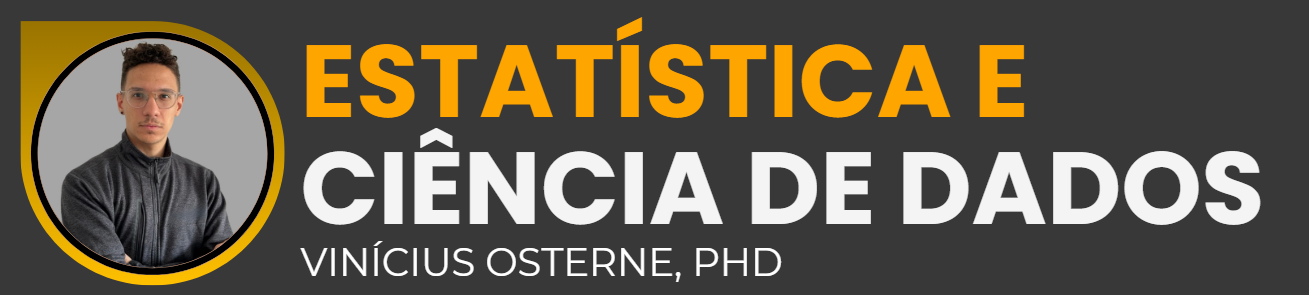

---

# **ANÁLISE DE REDUNDÂNCIA**

> **EXPLORANDO AS RELAÇÕES MULTIVARIADAS ENTRE VARIÁVEIS LATENTES**



---
<br><br><br><br><br><br><br>

# **1. INTRODUÇÃO**

- A **Análise de Redundância (RDA)** é uma técnica estatística multivariada usada para investigar **quanto da variação em um conjunto de variáveis dependentes (Y)** pode ser **explicada linearmente por outro conjunto de variáveis independentes (X)**.  

- Enquanto a **Análise de Correlação Canônica (CCA)** busca **maximizar a correlação** entre dois conjuntos, a RDA busca **maximizar a variância explicada** de um conjunto em função do outro.  

- Em **psicometria** e **ciências comportamentais**, a RDA é especialmente útil para compreender como **fatores contextuais, sociodemográficos ou clínicos** explicam **conjuntos de escores psicológicos, emocionais ou cognitivos**.  

- Na prática, ela permite avaliar **o grau de redundância informacional** — isto é, quanto das variações observadas em medidas psicológicas podem ser previstas por variáveis explicativas externas.

<br><br><br>

# **2. SOBRE O MÉTODO**

- Suponha dois blocos de variáveis:
  - **Bloco X (explicativo):** idade, horas de sono, estresse percebido, atividade física.  
  - **Bloco Y (resposta):** ansiedade, depressão, atenção, memória.

<br>

## **Passo 1**

- O primeiro passo da RDA é ajustar uma **regressão multivariada linear**, em que cada variável de $Y$ é ajustada em função das variáveis de $X$, ou seja:
$$Y = XB + E,$$
onde:  
  - $Y$ é uma matriz $(n \times q)$ de variáveis dependentes,  
  - $X$ é uma matriz $(n \times p)$ de variáveis explicativas,  
  - $B$ é a matriz $(p \times q)$ de coeficientes de regressão,  
  - $E$ é a matriz de resíduos.

- Daí, obtemos as **predições multivariadas** do bloco Y:
$$\hat{Y} = XB,$$
onde cada matriz tem a seguinte estrutura
$$
\underbrace{
\begin{bmatrix}
\hat{y}_{11} & \hat{y}_{12} & \cdots & \hat{y}_{1q} \\
\hat{y}_{21} & \hat{y}_{22} & \cdots & \hat{y}_{2q} \\
\vdots & \vdots & \ddots & \vdots \\
\hat{y}_{n1} & \hat{y}_{n2} & \cdots & \hat{y}_{nq}
\end{bmatrix}
}_{\hat{Y}_{(n \times q)}}
=
\underbrace{
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np}
\end{bmatrix}
}_{X_{(n \times p)}}
\;
\underbrace{
\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1q} \\
b_{21} & b_{22} & \cdots & b_{2q} \\
\vdots & \vdots & \ddots & \vdots \\
b_{p1} & b_{p2} & \cdots & b_{pq}
\end{bmatrix}
}_{B_{(p \times q)}}
$$

- Veja que cada linha de $\hat{Y}$ contém os **valores ajustados das variáveis de resposta** (por exemplo, ansiedade, depressão, atenção, memória) **a partir das combinações lineares das variáveis explicativas** (idade, sono, estresse, atividade física).

<br>

## **Passo 2**

- É exatamente sobre essa matriz $\hat{Y}$, isto é, **a parte de $Y$ explicada linearmente por $X$**, que partimos para a segunda parte da abordagem: **aplicação da Análise de Componentes Principais (PCA)**.  

- A ideia é decompor a **variância explicada de Y por X** em **componentes ortogonais**, denominados **componentes de redundância**.

- E, aqui, o processo é simples, é como aplicar componentes principais em uma matriz qualquer.

- A decomposição da PCA sobre $\hat{Y}$ será escrita como:
$$\hat{Y} = T P'$$
onde:  
  - $T$ é a matriz $(n \times r)$ de **escores** (observações nos novos eixos principais), ou seja, a matriz de componentes principais;
  - $P$ é a matriz $(q \times r)$ de **loadings** (pesos das variáveis originais de $Y$ nos componentes);  
  - $r$ é o número de componentes principais (geralmente $r \leq \min(n, q)$).

- A PCA da RDA não busca descrever $Y$ em si, mas a parte de $Y$ que é previsível a partir de $X$.

<br>

## **Atenção a alguns pontos**
- As variáveis geralmente são **padronizadas (z-score)** e impõem-se restrições para garantir ortogonalidade e comparabilidade:
$$\text{Var}(T) = 1, \quad \text{Cov}(T_i, T_j) = 0 \ (i \neq j)$$
- Cada eixo da RDA representa uma dimensão **independente** de explicação da variância de $Y$ por $X$.








<br><br><br>

# **4. INTERPRETAÇÃO DOS RESULTADOS**

- **R² Ajustado da RDA**  
  - Mede a proporção total de variância de Y explicada linearmente por X.  
  - É a métrica principal de redundância global.

- **Eixos de Redundância (RDA1, RDA2, …)**  
  - Representam gradientes de associação entre combinações de X e Y.  
  - São interpretados a partir dos **loadings** e dos **biplots**.

- **Loadings de X e Y**  
  - Indicam quais variáveis mais contribuem para cada eixo.  
  - A direção e o comprimento das setas mostram a força e o sentido das relações.

- **Redundância Média por Eixo**  
  - É a média dos $R^2$ entre os escores preditos de Y e os eixos da RDA.  
  - Mostra quanta informação útil cada eixo retém da variação explicável.

<br><br><br>

# **5. APLICAÇÃO**

- **Objetivo:** avaliar como **fatores sociodemográficos e comportamentais** (idade, sono, estresse, atividade física) explicam **indicadores psicológicos** (ansiedade, depressão, atenção, memória).  

- **Amostra:** 250 participantes adultos, avaliados por escalas padronizadas e questionários comportamentais.  

- **Hipótese:** **melhor sono e maior atividade física** estão associados a **menor ansiedade e depressão**, bem como a **melhor desempenho cognitivo**.

- **Resultados esperados:**  
  - O **Eixo 1 (RDA1)** reflete um gradiente de **bem-estar psicofísico** (↑ sono e atividade física → ↓ ansiedade e depressão).  
  - O **Eixo 2 (RDA2)** pode capturar um gradiente de **carga cognitiva**, associando **estresse e desempenho atencional**.  
  - O **R² ajustado global** indica o percentual de variância psicológica explicada pelas variáveis contextuais.


In [10]:
# Pacotes necessários
install.packages("vegan")      # análise de comunidades (inclui rda, anova.cca, scores)
install.packages("ggplot2")    # gráficos (opcional)
install.packages("dplyr")      # tabelas e manipulação (opcional)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
# Carregando os pacotes
library(vegan)
library(ggplot2)
library(dplyr)
set.seed(123)  # para reprodutibilidade das permutações

In [15]:
# Dados
data(dune)      # matriz site × espécies (abundâncias)
data(dune.env)  # variáveis ambientais (fatores e numéricas)

In [16]:
# Detalhes da base
dim(dune)
head(dune, 3)

# Achimill: Achillea millefolium (mil-folhas)
# Agrostol: Agrostis stolonifera (grama rasteira)
# Airaprae: Aira praecox (falsa-aveia precoce)
# Alopgeni: Alopecurus geniculatus (rabo-de-raposa geniculado)

[1] 20 30

,Achimill,Agrostol,Airaprae,Alopgeni,Anthodor,Bellpere,Bromhord,Chenalbu,Cirsarve,Comapalu,⋯,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,3,0,0,2,0,3,4,0,0,0,⋯,0,0,0,0,5,0,5,0,0,0
3,0,4,0,7,0,2,0,0,0,0,⋯,0,0,0,0,2,0,2,0,2,0


In [17]:
# Detalhes da base
dim(dune.env)
head(dune.env, 3)

# A1: Altitude relativa do sítio
# Moisture: Umidade do solo
# Management: Tipo de manejo
# Use: Intensidade de uso agrícola
# Manure: Nível de adubação orgânica

[1] 20  5

,A1,Moisture,Management,Use,Manure
,<dbl>,<ord>,<fct>,<ord>,<ord>
1,2.8,1,SF,Haypastu,4
2,3.5,1,BF,Haypastu,2
3,4.3,2,SF,Haypastu,4


In [21]:
# Ajustando o modelo: todas as colunas de dune como resposta VERSUS todas as colunas de dune.env como preditoras
mod <- rda(dune ~ ., data = dune.env)
mod



Some constraints or conditions were aliased because they were redundant. This
can happen if terms are constant or linearly dependent (collinear): ‘Manure^4’




Call: rda(formula = dune ~ A1 + Moisture + Management + Use + Manure, data
= dune.env)

              Inertia Proportion Rank
Total         84.1237     1.0000     
Constrained   63.2062     0.7513   12
Unconstrained 20.9175     0.2487    7

Inertia is variance

-- NOTE:
Some constraints or conditions were aliased because they were redundant.
This can happen if terms are constant or linearly dependent (collinear):
‘Manure^4’

Eigenvalues for constrained axes:
  RDA1   RDA2   RDA3   RDA4   RDA5   RDA6   RDA7   RDA8   RDA9  RDA10  RDA11 
22.396 16.208  7.039  4.038  3.760  2.609  2.167  1.803  1.404  0.917  0.582 
 RDA12 
 0.284 

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7 
6.627 4.309 3.549 2.546 2.340 0.934 0.612 


In [19]:
# Interpretação:
# - Total: Toda a variação existente nas espécies
# - Constrained: Parte dessa variação explicável pelas variáveis ambientais (X)
# - Unconstrained: Parte não explicada, que sobra após a regressão

In [23]:
# Mais informações
summary(mod)


Call:
rda(formula = dune ~ A1 + Moisture + Management + Use + Manure,      data = dune.env) 

Partitioning of variance:
              Inertia Proportion
Total           84.12     1.0000
Constrained     63.21     0.7513
Unconstrained   20.92     0.2487

Eigenvalues, and their contribution to the variance 

Importance of components:
                         RDA1    RDA2    RDA3   RDA4   RDA5    RDA6    RDA7
Eigenvalue            22.3955 16.2076 7.03891 4.0380 3.7602 2.60874 2.16693
Proportion Explained   0.2662  0.1927 0.08367 0.0480 0.0447 0.03101 0.02576
Cumulative Proportion  0.2662  0.4589 0.54256 0.5906 0.6353 0.66627 0.69203
                         RDA8    RDA9   RDA10    RDA11    RDA12     PC1     PC2
Eigenvalue            1.80327 1.40421 0.91739 0.581545 0.283927 6.62687 4.30914
Proportion Explained  0.02144 0.01669 0.01091 0.006913 0.003375 0.07878 0.05122
Cumulative Proportion 0.71346 0.73015 0.74106 0.747973 0.751348 0.83012 0.88135
                          PC3     PC4     

In [25]:
# Cálculo do R2
# - Proporção da inércia (variação) explicada pelas restrições
R2_raw <- mod$CCA$tot.chi / mod$tot.chi
R2_raw

[1] 0.7513483

In [27]:
# R2 ajustado
# - quanto mais preditores, maior o R2 comum (mesmo sem significado)
# - usamos o R2 ajustado para penalizar o número de preditores e o número de unidade amostrais
R2_adj <- RsquareAdj(mod)$adj.r.squared

cat("R² (inércia explicada): ", round(R2_raw, 3), "\n")
cat("R² ajustado:            ", round(R2_adj, 3), "\n")

R² (inércia explicada):  0.751 
R² ajustado:             0.325 


In [29]:
# teste global:
# - existe relação Y ~ X?
anova_global = anova.cca(mod, permutations = 999)
anova_global

# p < 0.05, então o modelo é estatisticamente significativo, ou seja, existe relação linear multivariada entre os conjuntos Y e X

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Model,12,63.20618,1.762652,0.005
Residual,7,20.91750,NA,NA


In [30]:
# por eixo
# - quais eixos RDA são significativos?
# - testa cada eixo individualmente (RDA1 é testado primeiro, mantendo as variáveis explicativas X fixas)
# - em seguida, testa o RDA2, condicionando no RDA1
# - cada eixo é testado após remover a influência dos anteriores
anova_axis = anova.cca(mod, permutations = 999, by = "axis")
anova_axis

,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
RDA1,1,22.3955042,7.4946114,0.002
RDA2,1,16.2076358,6.1986896,0.022
RDA3,1,7.0389119,3.0285746,0.174
RDA4,1,4.0379533,1.9304187,0.887
RDA5,1,3.7601710,1.9773817,0.887
RDA6,1,2.6087429,1.4965897,0.974
RDA7,1,2.1669254,1.3467207,0.977
RDA8,1,1.8032666,1.2069192,0.977
RDA9,1,1.4042135,1.0069656,0.977


In [33]:
# por termo
# - quais variáveis ambientais (TERMS do modelo) contribuem significativamente?
# - testa cada TERMO do modelo mantendo os demais no modelo (efeito "marginal" do termo)
# - fatores entram como UM termo (todas as dummies/constrastes do fator são testadas em conjunto)
# - termos com vários graus de liberdade (df > 1) aparecem com a soma de sua inércia e um único p-valor
anova_terms <- anova.cca(mod, permutations = 999, by = "terms")
anova_terms


,Df,Variance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
A1,1,8.114767,2.7155907,0.004
Moisture,3,21.649747,2.4150151,0.005
Management,3,19.115296,2.1322987,0.006
Use,2,4.700650,0.7865317,0.705
Manure,3,9.625725,1.0737433,0.361
Residual,7,20.917499,NA,NA


In [35]:
# Resumo de autovalores

# Autovalores dos eixos restritos (RDA)
eig <- mod$CCA$eig                       # autovalores dos eixos restritos
var_exp <- eig / sum(eig)                # proporção de variância explicada por eixo

# Tabela com autovalores, variância explicada e acumulada
tab_eig <- data.frame(
  eixo = paste0("RDA", seq_along(eig)),
  autovalor = eig,
  var_explicada = var_exp,
  var_acum = cumsum(var_exp)
)

# Arredondar apenas colunas numéricas
library(dplyr)
tab_eig_fmt <- tab_eig %>%
  mutate(across(where(is.numeric), ~ round(.x, 3))) %>%
  mutate(
    pct = paste0(round(100 * var_explicada, 1), "%"),
    pct_acum = paste0(round(100 * var_acum, 1), "%")
  )

# Visualizar tabela formatada
tab_eig_fmt

,eixo,autovalor,var_explicada,var_acum,pct,pct_acum
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
RDA1,RDA1,22.396,0.354,0.354,35.4%,35.4%
RDA2,RDA2,16.208,0.256,0.611,25.6%,61.1%
RDA3,RDA3,7.039,0.111,0.722,11.1%,72.2%
RDA4,RDA4,4.038,0.064,0.786,6.4%,78.6%
RDA5,RDA5,3.760,0.059,0.845,5.9%,84.5%
RDA6,RDA6,2.609,0.041,0.887,4.1%,88.7%
RDA7,RDA7,2.167,0.034,0.921,3.4%,92.1%
RDA8,RDA8,1.803,0.029,0.950,2.9%,95%
RDA9,RDA9,1.404,0.022,0.972,2.2%,97.2%


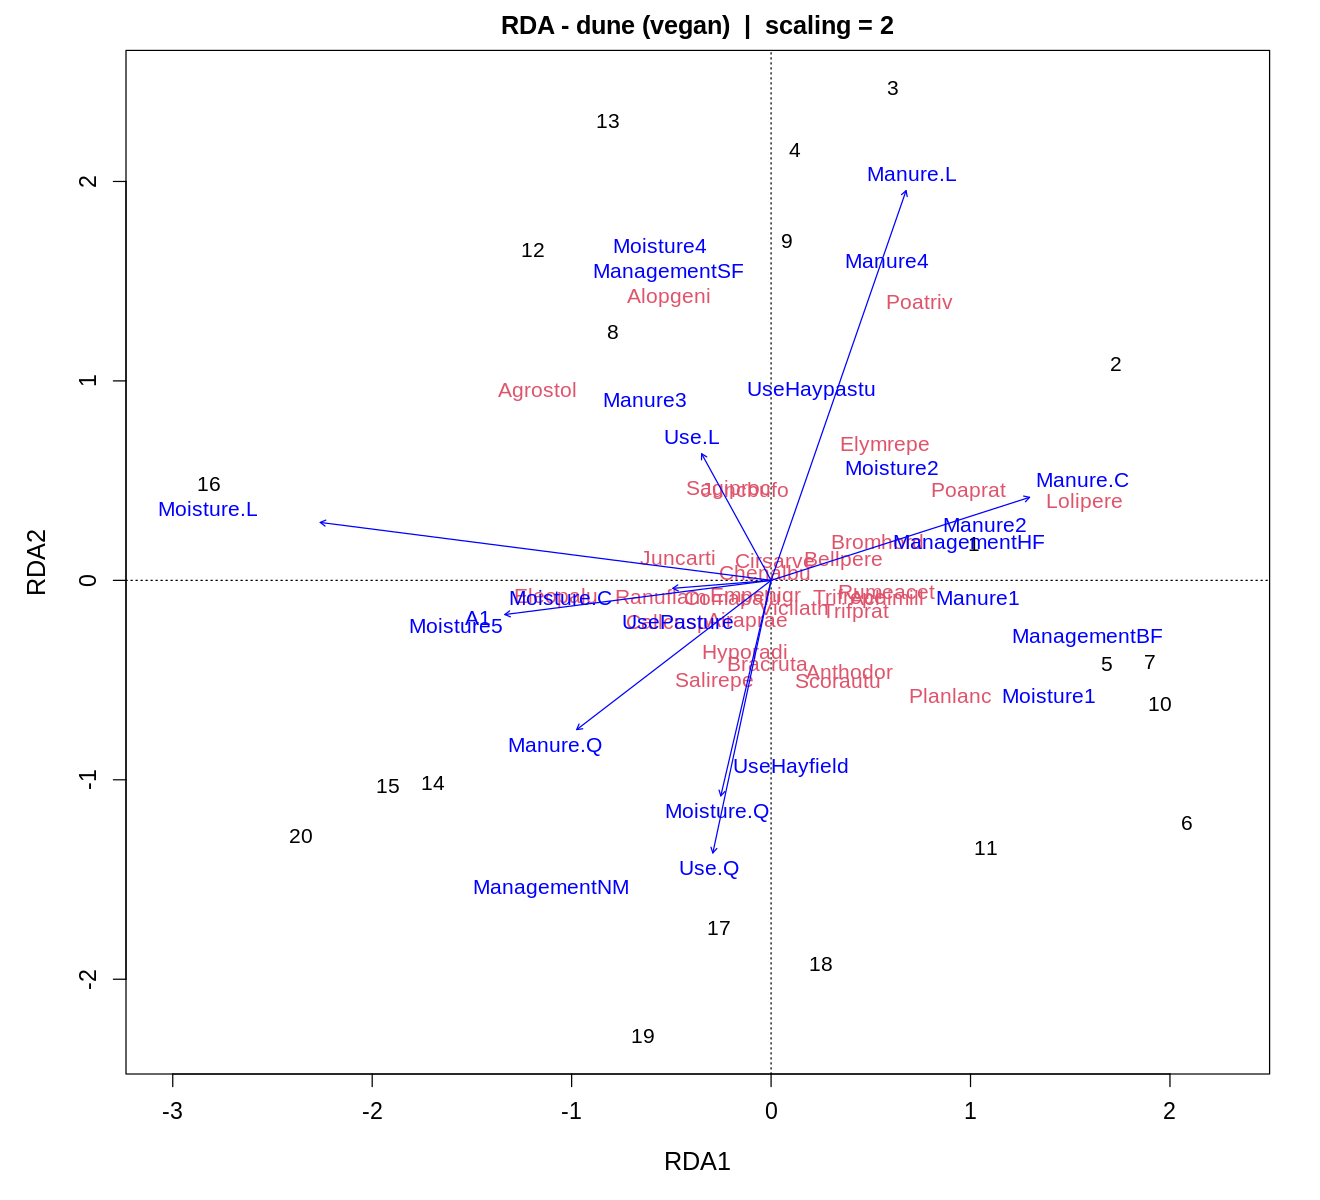

In [41]:
# Biplot da RDA
# scaling = 2 -> mantém proporções adequadas entre espécies e variáveis ambientais
options(repr.plot.width = 11, repr.plot.height = 10)  # ajuste a seu gosto (em polegadas)
par(mar = c(5,5,2,2), cex = 1.05, cex.lab = 1.2, cex.axis = 1.1, cex.main = 1.2)
plot(mod, scaling = 2,
     main = "RDA - dune (vegan)  |  scaling = 2",
     cex = 1.0)  # tamanho base dos textos/labels do plot.cca

# Atenção ao scaling:
# - scaling = 1: foca nas relações entre espécies (Y). Estudar similaridade entre espécies ou fazer ecologia de comunidades.
# - scaling = 2: foca nas relações entre Y e X. Interpretar como os gradientes ambientais explicam as espécies.

# Pontos: unidade amostrais)
# Setas vermelhas: espécies (bloco Y)
# Setas azui: variáveis ambientais (bloco X)

In [ ]:
# Interpretação (eixo RDA1):

# Fortemente orientado pelas variáveis:
# - Manure (adubação orgânica): setas “Manure1, Manure2, Manure3, Manure4” apontam para a direita.
# - Management (tipo de manejo): níveis “BF” e “HF” também à direita.
# - Moisture1–2 (umidade baixa a moderada) também à direita.

# Interpretação:
# - pode representar um gradiente de manejo intensivo e fertilização
# - à direita estão áreas mais adubadas e manejadas (ex.: pastos ricos)
# - à esquerda, ambientes menos adubados e com menor fertilidade e umidade (campos secos)

# Espécies associadas a ambientes mais férteis (direita):
# - Lolium perenne, Poa pratensis, Trifolium repens — espécies típicas de pastagens cultivadas.
# - Espécies associadas a ambientes pobres (esquerda):
# - Agrostis stolonifera, Aira praecox, Alopecurus geniculatus — espécies de campos úmidos ou menos manejados.